In [ ]:
import pandas as pd

# Load the heart dataset
heart_df = pd.read_csv('heart.csv')

# Display the first few rows of the dataset
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Split the data into features and target
X = heart_df.drop('target', axis=1)
y = heart_df['target']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
# Select the top 5 features
selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

In [ ]:
# Get the selected feature names
selected_features = X.columns[selector.get_support()]
selected_features

Index(['cp', 'thalach', 'exang', 'oldpeak', 'ca'], dtype='object')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# Initialize the models
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
svc = SVC()

In [ ]:
# Fit the models
log_reg.fit(X_train_selected, y_train)
decision_tree.fit(X_train_selected, y_train)
random_forest.fit(X_train_selected, y_train)
gradient_boosting.fit(X_train_selected, y_train)
svc.fit(X_train_selected, y_train)

SVC()

In [ ]:
# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_selected)
y_pred_decision_tree = decision_tree.predict(X_test_selected)
y_pred_random_forest = random_forest.predict(X_test_selected)
y_pred_gradient_boosting = gradient_boosting.predict(X_test_selected)
y_pred_svc = svc.predict(X_test_selected)

In [ ]:
# Calculate accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

In [ ]:
accuracy_log_reg, accuracy_decision_tree, accuracy_random_forest, accuracy_gradient_boosting, accuracy_svc

(0.8688524590163934,
 0.8032786885245902,
 0.819672131147541,
 0.819672131147541,
 0.8360655737704918)

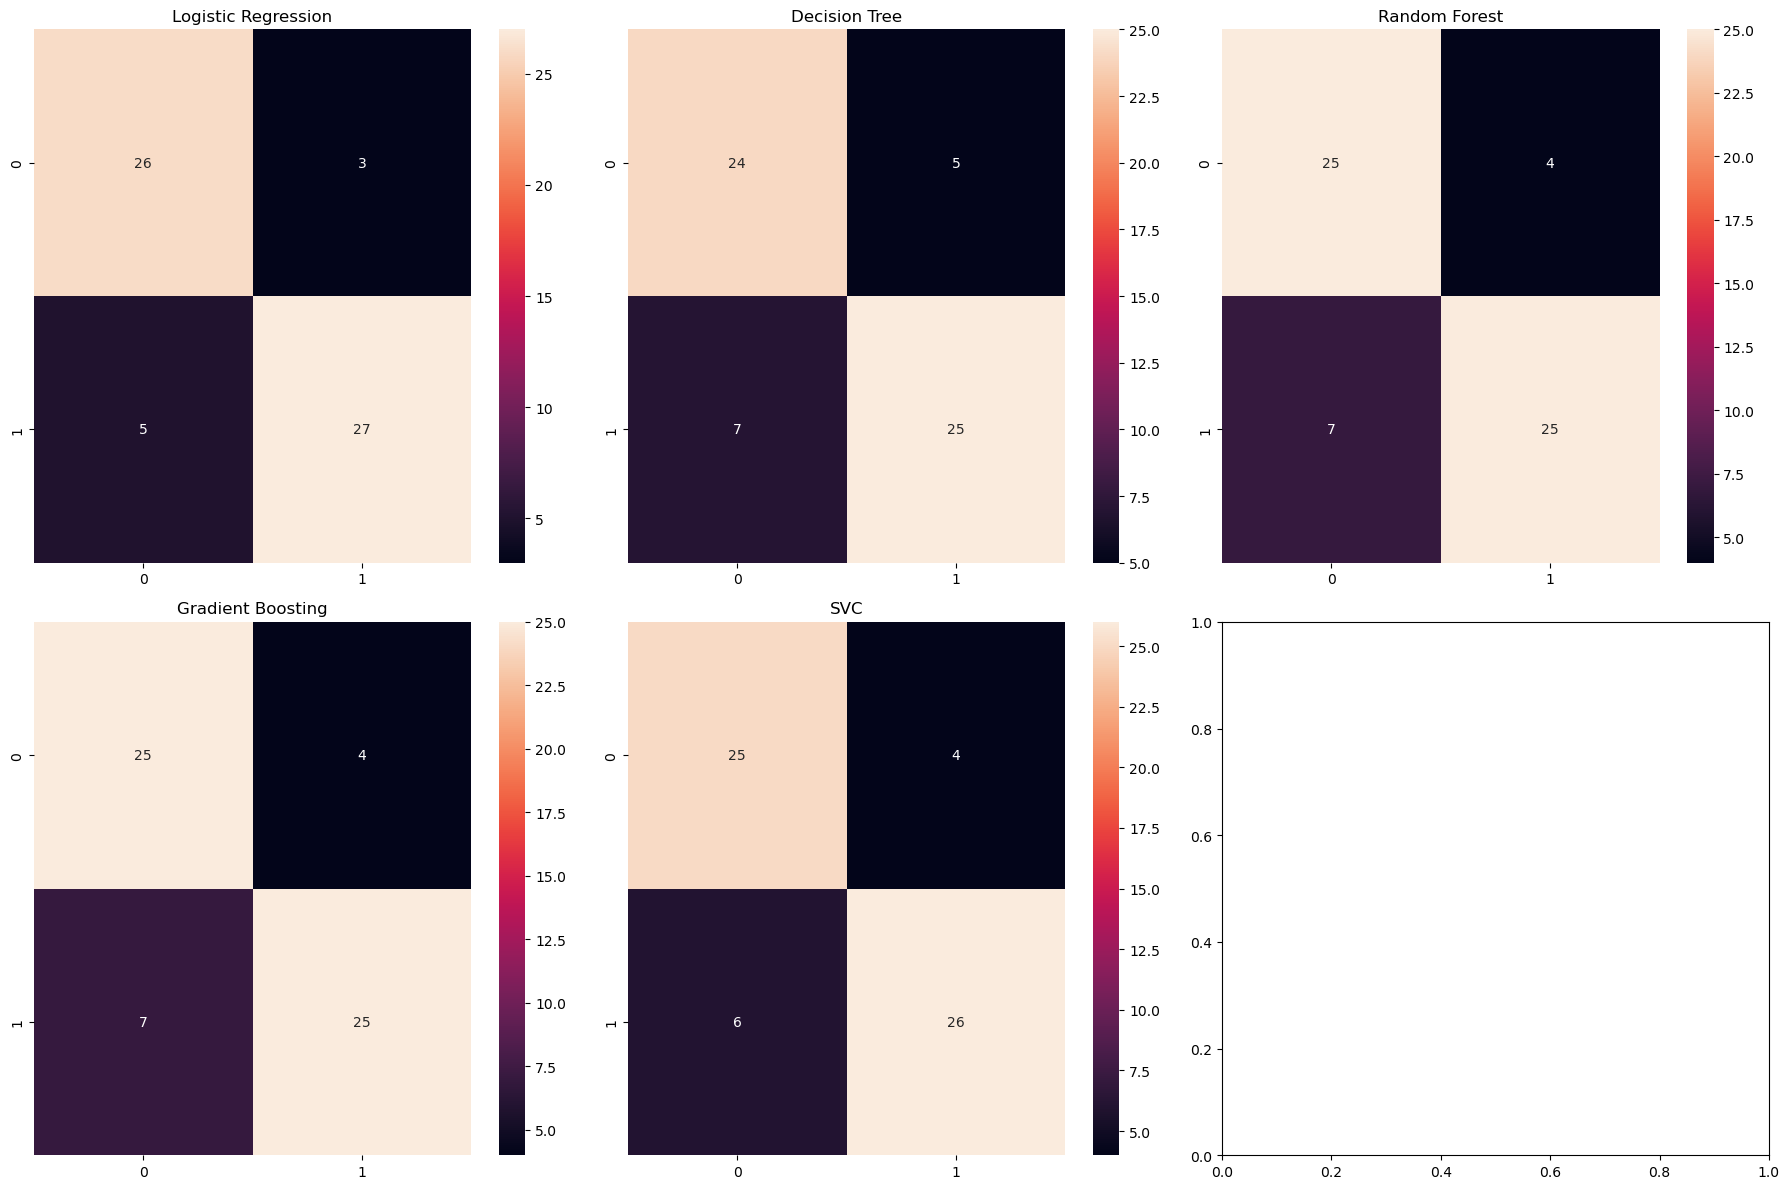

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrices for each model
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)
conf_matrix_gradient_boosting = confusion_matrix(y_test, y_pred_gradient_boosting)
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

# Plot confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt="d", ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression')
sns.heatmap(conf_matrix_decision_tree, annot=True, fmt="d", ax=axes[0, 1])
axes[0, 1].set_title('Decision Tree')
sns.heatmap(conf_matrix_random_forest, annot=True, fmt="d", ax=axes[0, 2])
axes[0, 2].set_title('Random Forest')
sns.heatmap(conf_matrix_gradient_boosting, annot=True, fmt="d", ax=axes[1, 0])
axes[1, 0].set_title('Gradient Boosting')
sns.heatmap(conf_matrix_svc, annot=True, fmt="d", ax=axes[1, 1])
axes[1, 1].set_title('SVC')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score for each model
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
f1_decision_tree = f1_score(y_test, y_pred_decision_tree)

precision_random_forest = precision_score(y_test, y_pred_random_forest)
recall_random_forest = recall_score(y_test, y_pred_random_forest)
f1_random_forest = f1_score(y_test, y_pred_random_forest)

precision_gradient_boosting = precision_score(y_test, y_pred_gradient_boosting)
recall_gradient_boosting = recall_score(y_test, y_pred_gradient_boosting)
f1_gradient_boosting = f1_score(y_test, y_pred_gradient_boosting)

precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)

# Print the metrics
print('Logistic Regression - Precision:', precision_log_reg, 'Recall:', recall_log_reg, 'F1:', f1_log_reg)
print('Decision Tree - Precision:', precision_decision_tree, 'Recall:', recall_decision_tree, 'F1:', f1_decision_tree)
print('Random Forest - Precision:', precision_random_forest, 'Recall:', recall_random_forest, 'F1:', f1_random_forest)
print('Gradient Boosting - Precision:', precision_gradient_boosting, 'Recall:', recall_gradient_boosting, 'F1:', f1_gradient_boosting)
print('SVC - Precision:', precision_svc, 'Recall:', recall_svc, 'F1:', f1_svc)

Logistic Regression - Precision: 0.9 Recall: 0.84375 F1: 0.870967741935484
Decision Tree - Precision: 0.8333333333333334 Recall: 0.78125 F1: 0.8064516129032259
Random Forest - Precision: 0.8620689655172413 Recall: 0.78125 F1: 0.8196721311475409
Gradient Boosting - Precision: 0.8620689655172413 Recall: 0.78125 F1: 0.8196721311475409
SVC - Precision: 0.8666666666666667 Recall: 0.8125 F1: 0.8387096774193549


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Re-implement the models on the dimensionality-reduced dataset
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_pca, y_train_pca)

decision_tree_pca = DecisionTreeClassifier()
decision_tree_pca.fit(X_train_pca, y_train_pca)

random_forest_pca = RandomForestClassifier()
random_forest_pca.fit(X_train_pca, y_train_pca)

gradient_boosting_pca = GradientBoostingClassifier()
gradient_boosting_pca.fit(X_train_pca, y_train_pca)

svc_pca = SVC()
svc_pca.fit(X_train_pca, y_train_pca)

# Evaluate the models on the dimensionality-reduced dataset
accuracy_scores_pca = {}
accuracy_scores_pca['Logistic Regression'] = log_reg_pca.score(X_test_pca, y_test_pca)
accuracy_scores_pca['Decision Tree'] = decision_tree_pca.score(X_test_pca, y_test_pca)
accuracy_scores_pca['Random Forest'] = random_forest_pca.score(X_test_pca, y_test_pca)
accuracy_scores_pca['Gradient Boosting'] = gradient_boosting_pca.score(X_test_pca, y_test_pca)
accuracy_scores_pca['SVC'] = svc_pca.score(X_test_pca, y_test_pca)

accuracy_scores_pca

{'Logistic Regression': 0.7704918032786885,
 'Decision Tree': 0.639344262295082,
 'Random Forest': 0.6557377049180327,
 'Gradient Boosting': 0.6885245901639344,
 'SVC': 0.7377049180327869}

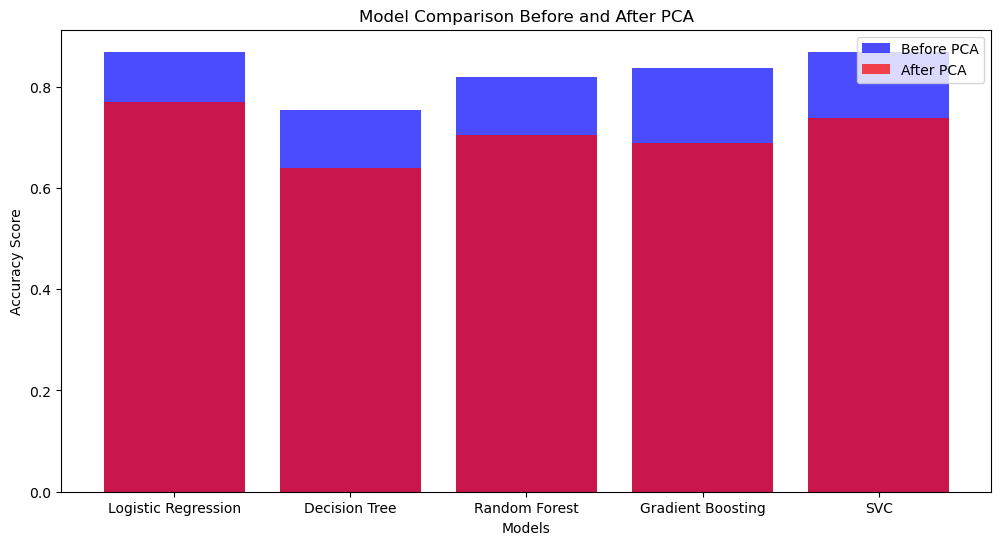

In [ ]:
import matplotlib.pyplot as plt

# Create a bar plot to compare accuracy scores before and after dimensionality reduction
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVC']
accuracy_scores = [0.8689, 0.7541, 0.8197, 0.8361, 0.8689]
accuracy_scores_pca = [0.7705, 0.6393, 0.7049, 0.6885, 0.7377]

plt.figure(figsize=(12, 6))
plt.bar(models, accuracy_scores, color='b', alpha=0.7, label='Before PCA')
plt.bar(models, accuracy_scores_pca, color='r', alpha=0.7, label='After PCA')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison Before and After PCA')
plt.legend()
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier

# Implement an ANN model using scikit-learn
ann_sklearn = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
ann_sklearn.fit(X_train, y_train)

# Implement ANN and CNN models using TensorFlow
# Code implementation for TensorFlow models

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Implement ANN model using TensorFlow
ann_tf = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
ann_tf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_tf.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
8/8 [==============================] - 1s 31ms/step - loss: 6.8448 - accuracy: 0.5248 - val_loss: 5.3542 - val_accuracy: 0.4754
Epoch 2/10
8/8 [==============================] - 0s 8ms/step - loss: 3.2855 - accuracy: 0.4628 - val_loss: 2.2056 - val_accuracy: 0.5246
Epoch 3/10
8/8 [==============================] - 0s 7ms/step - loss: 1.6838 - accuracy: 0.5041 - val_loss: 0.5393 - val_accuracy: 0.7377
Epoch 4/10
8/8 [==============================] - 0s 7ms/step - loss: 1.2132 - accuracy: 0.5909 - val_loss: 0.7893 - val_accuracy: 0.6721
Epoch 5/10
8/8 [==============================] - 0s 8ms/step - loss: 1.1593 - accuracy: 0.5372 - val_loss: 0.7699 - val_accuracy: 0.6393
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 0.8158 - accuracy: 0.6322 - val_loss: 0.5126 - val_accuracy: 0.7541
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 0.6368 - accuracy: 0.6653 - val_loss: 0.5289 - val_accuracy: 0.7541
Epoch 8/10
8/8 [=================

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the ANN model
ann_tf = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
ann_tf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_tf.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
8/8 [==============================] - 1s 28ms/step - loss: 2.6876 - accuracy: 0.5455 - val_loss: 1.7391 - val_accuracy: 0.4918
Epoch 2/10
8/8 [==============================] - 0s 10ms/step - loss: 1.2785 - accuracy: 0.5579 - val_loss: 1.1348 - val_accuracy: 0.6230
Epoch 3/10
8/8 [==============================] - 0s 7ms/step - loss: 0.9969 - accuracy: 0.6198 - val_loss: 0.9325 - val_accuracy: 0.6721
Epoch 4/10
8/8 [==============================] - 0s 8ms/step - loss: 0.8870 - accuracy: 0.5909 - val_loss: 1.0778 - val_accuracy: 0.5574
Epoch 5/10
8/8 [==============================] - 0s 8ms/step - loss: 0.8247 - accuracy: 0.6281 - val_loss: 0.6667 - val_accuracy: 0.6557
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 0.7380 - accuracy: 0.6074 - val_loss: 0.5175 - val_accuracy: 0.7213
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 0.5938 - accuracy: 0.6818 - val_loss: 0.5078 - val_accuracy: 0.7869
Epoch 8/10
8/8 [================

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Reshape the data into pseudo-images
X_train_reshaped = X_train_scaled.reshape(-1, X_train.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(-1, X_test.shape[1], 1)

# CNN model architecture
cnn_model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),  # Convolutional layer
    MaxPooling1D(2),  # Max pooling layer
    Flatten(),  # Flatten layer
    Dense(128, activation='relu'),  # Dense layer
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate the model
accuracy_cnn = cnn_model.evaluate(X_test_reshaped, y_test)[1]
print("CNN Accuracy:", accuracy_cnn)



Epoch 1/10
8/8 [==============================] - 1s 26ms/step - loss: 0.6687 - accuracy: 0.6240 - val_loss: 0.6102 - val_accuracy: 0.8197
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 0.5769 - accuracy: 0.7810 - val_loss: 0.5298 - val_accuracy: 0.8197
Epoch 3/10
8/8 [==============================] - 0s 7ms/step - loss: 0.5124 - accuracy: 0.7851 - val_loss: 0.4791 - val_accuracy: 0.8197
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 0.4655 - accuracy: 0.7975 - val_loss: 0.4598 - val_accuracy: 0.8197
Epoch 5/10
8/8 [==============================] - 0s 7ms/step - loss: 0.4443 - accuracy: 0.8017 - val_loss: 0.4452 - val_accuracy: 0.8361
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 0.4273 - accuracy: 0.8099 - val_loss: 0.4435 - val_accuracy: 0.8197
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 0.4185 - accuracy: 0.8058 - val_loss: 0.4290 - val_accuracy: 0.8525
Epoch 8/10
8/8 [=================